In [3]:
# import needed modules
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import pathlib
import pickle

class resNetGuineaPig:
    def __init__(self,url):
        self.url = url

    def loadImageDataset(self):
        # data_dir = tf.keras.utils.get_file('guineapigTAR', origin=self.url, untar=True)
        data_dir = pathlib.Path("../../Dataset/Guinea Pig")     # modified the path due to error in file naming
        #show path location
        print(data_dir)
        #show sample image
        TGP = list(data_dir.glob('Rex Guinea Pig/*'))
        print(TGP[500])
        PIL.Image.open(str(TGP[500]))
        self.data_dir = data_dir

    def train_validation(self):
        self.img_height,self.img_width=256,256
        batch_size=32
        train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            self.data_dir,
            validation_split=0.2,
            subset="training",
            seed=123,
            shuffle = True,
            image_size=(self.img_height, self.img_width),
            batch_size=batch_size)
        val_ds = tf.keras.preprocessing.image_dataset_from_directory(
            self.data_dir,
            validation_split=0.2,
            subset="validation",
            seed=123,
            shuffle = True,
            image_size=(self.img_height, self.img_width),
            batch_size=batch_size)

        self.train_ds = train_ds
        self.val_ds = val_ds
        self.class_names = train_ds.class_names

    def build_model(self):
        self.resnet_model = Sequential()

        pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                            input_shape=(256,256,3),
                            pooling='avg',classes=1000,
                            weights='imagenet'
                            )

        for layer in pretrained_model.layers:
                layer.trainable=False

        self.resnet_model.add(pretrained_model)
        self.resnet_model.add(Flatten())
        self.resnet_model.add(Dense(512, activation='relu')) # 512
        self.resnet_model.add(Dense(10, activation='softmax'))

    def train_model(self):
        # add early stopping callback
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        # 1st Batch
        self.resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        epochs=15
        history = self.resnet_model.fit(
            self.train_ds,
            validation_data=self.val_ds,
            epochs=epochs,
            callbacks=[early_stopping]  # save_ck for testing
        )
        # 2nd batch
        self.resnet_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

        epochs=15
        history = self.resnet_model.fit(
            self.train_ds,
            validation_data=self.val_ds,
            epochs=epochs,
            callbacks=[early_stopping]
        )
        self.history = history

    def evaluate_model(self):
        fig1 = plt.gcf()
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.axis(ymin=0.4,ymax=1)
        plt.grid()
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epochs')
        plt.legend(['train', 'validation'])
        return plt.show()
    
    def predict_image(self,img):
        import cv2
        image=cv2.imread(img)
        image_resized= cv2.resize(image, (self.img_height,self.img_width))
        image=np.expand_dims(image_resized,axis=0)
        print(image.shape)

        pred=self.resnet_model.predict(image)
        output_class=self.class_names[np.argmax(pred)]
        return output_class
    def saving_model(self,file_path):
        data_to_save = {
            'class_name': self.class_names,
            'height': self.img_height,
            'width': self.img_width
        }
        with open("dataSaved.pkl", 'wb') as file:
            pickle.dump(data_to_save, file)
        
        self.resnet_model.save(file_path)



/Users/john_calimoso/Documents/John Folder/AI Model to Deploy/AI Model/Dataset/Guinea Pig
/Users/john_calimoso/Documents/John Folder/AI Model to Deploy/AI Model/Dataset/Guinea Pig/Rex Guinea Pig/Rex_Guinea_Pig_original_Rex_Guinea_Pig9.jpg_1f85adda-ce40-4266-8a7b-4f1d65734c0f.jpg
Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


Epoch 1/15
250/250 [==============================] - 78s 307ms/step - loss: 1.0180 - accuracy: 0.7327 - val_loss: 0.4495 - val_accuracy: 0.8460
Epoch 2/15
250/250 [==============================] - 76s 304ms/step - loss: 0.3318 - accuracy: 0.8882 - val_loss: 0.2203 - val_accuracy: 0.9295
Epoch 3/15
250/250 [==============================] - 77s 304ms/step - loss: 0.1754 - accuracy: 0.9434 - val_loss: 0.1654 - val_accuracy: 0.9500
Epoch 4/15
250/250 [==============================] - 76s 304ms/step - loss: 0.1826 - accuracy: 0.9464 - val_loss: 0.2495 - val_accuracy: 0.9065
Epoch 5/15
250/250 [==============================] - 76s 304ms/step - loss: 0.1287 - accuracy: 0.9597 - val_loss: 0.2068 - val_accuracy: 0.9325
Epoch 6/15
250/250 [==============================] - 77s 305ms/step - loss: 0.1170 - accuracy: 0.9616 - val_loss: 0.2264 - val_accuracy: 0.9270


Epoch 1/15
250/250 [==============================] - 78s 306ms/step - loss: 0.2378 - accuracy: 0.9218 - val_loss: 0.3360 - val_accuracy: 0.8975
Epoch 2/15
250/250 [==============================] - 77s 304ms/step - loss: 0.2018 - accuracy: 0.9391 - val_loss: 0.1526 - val_accuracy: 0.9530
Epoch 3/15
250/250 [==============================] - 77s 305ms/step - loss: 0.1180 - accuracy: 0.9641 - val_loss: 0.1770 - val_accuracy: 0.9475
Epoch 4/15
250/250 [==============================] - 77s 305ms/step - loss: 0.1882 - accuracy: 0.9471 - val_loss: 0.1470 - val_accuracy: 0.9590
Epoch 5/15
250/250 [==============================] - 76s 304ms/step - loss: 0.1358 - accuracy: 0.9609 - val_loss: 0.2323 - val_accuracy: 0.9390
Epoch 6/15
250/250 [==============================] - 76s 304ms/step - loss: 0.1153 - accuracy: 0.9672 - val_loss: 0.1651 - val_accuracy: 0.9560
Epoch 7/15
250/250 [==============================] - 77s 304ms/step - loss: 0.1355 - accuracy: 0.9649 - val_loss: 0.1853 - val_ac

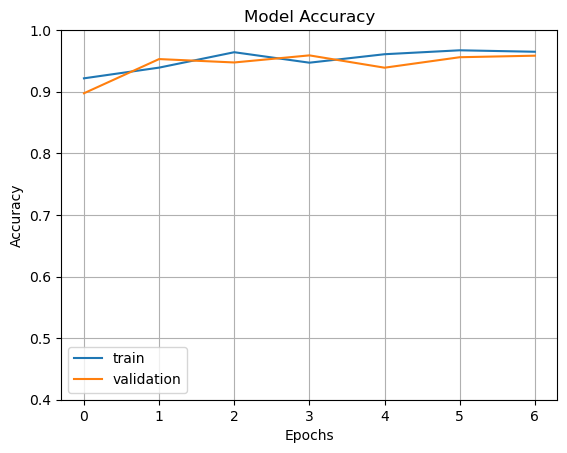

(1, 256, 256, 3)
1/1 [==============================] - 1s 681ms/step
The Predicted Breed is White Crested Guinea Pig


/Users/john_calimoso/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
if __name__=='__main__':
    resGP = resNetGuineaPig('')
    resGP.loadImageDataset()
    resGP.train_validation()
    resGP.build_model()
    resGP.train_model()
    resGP.evaluate_model()

    # get image for prediction
    url_img = '/Users/john_calimoso/Documents/John Folder/Thesis Project/ResnetTransferLearning/Sample Picture For Testing/crested-guinea-pig-3.jpg'
    output = resGP.predict_image(url_img)

    print(f"The Predicted Breed is {output}")
    
    resGP.saving_model('ResnetSavemodel.h5')

In [ ]:
# resGP.resnet_model.save('/Users/john_calimoso/Desktop/Guineapig resnet50 OOP /ResnetSavemodel.h5')

In [5]:
# Load the model
loaded_model = tf.keras.models.load_model("./ResnetSavemodel.h5")

In [6]:
import cv2
image=cv2.imread("/Users/john_calimoso/Documents/John Folder/Thesis Project/ResnetTransferLearning/Sample Picture For Testing/bis_black_himalayan_saywell_med.jpeg")
image_resized= cv2.resize(image, (256,256))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

pred=loaded_model.predict(image)
output_class=resGP.class_names[np.argmax(pred)]

print(output_class)


(1, 256, 256, 3)
1/1 [==============================] - 1s 524ms/step
Himalayan Guinea Pig
